# Libraries

In [16]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import librosa

# Download Datasets

In [ ]:
from dataset_downloader import DatasetDownloader

dataset_downloader = DatasetDownloader()

yaml_file_path = "datasets/path_files/download_paths_2025.yaml"
dataset_downloader.process_yaml(yaml_file_path)

# Code

In [ ]:
#> load audio files
file_path = "datasets/DCASE2025T2/ToyCar/Development/train/section_00_source_train_normal_0000_car_D2_spd_40V_mic_1.wav"
amplitude, sampling_rate = librosa.load(file_path, sr=None, mono=True)

In [11]:
#> apply stft
number_of_ffts = 2048
hop_size = 512
window_size = number_of_ffts

stft = librosa.stft(amplitude, n_fft=number_of_ffts, hop_length=hop_size, win_length=window_size)

In [12]:
#> convert to magnitude and log-scale
magnitude = np.abs(stft)

log_spectrogram = librosa.amplitude_to_db(magnitude, ref=np.max)

In [13]:
#> normalize the data
min_val = np.min(log_spectrogram)
max_val = np.max(log_spectrogram)
normalized_log_spectrogram = (log_spectrogram - min_val) / (max_val - min_val)

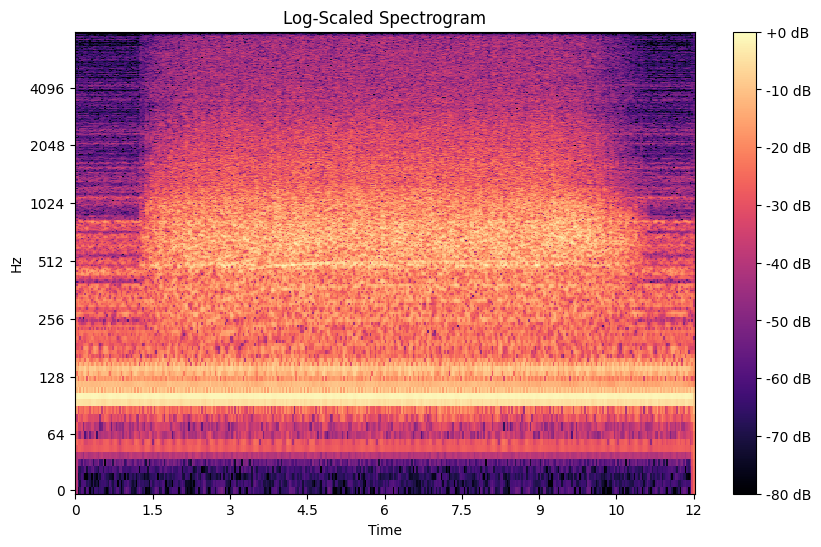

In [15]:
#> visuialize the spectrogram

plt.figure(figsize=(10, 6))
librosa.display.specshow(log_spectrogram, sr=sampling_rate, hop_length=hop_size, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title("Log-Scaled Spectrogram")
plt.show()